# Breast Cancer

#### Descripción del conjunto de datos:

El conjunto de datos es un conjunto clásico de datos sobre cáncer de mama que se utiliza comúnmente en la comunidad de aprendizaje automático para la clasificación binaria. Contiene características calculadas a partir de imágenes digitalizadas de muestras de tejido mamario, que describen diversas características de los núcleos celulares presentes en las imágenes. Las características están divididas en tres grupos: mean (media), se (error estándar) y worst (el peor valor promedio de las características).

#### Relevancia del conjunto de datos:

Este conjunto de datos es relevante para el estudio debido a su aplicación en la detección temprana y el diagnóstico del cáncer de mama. El cáncer de mama es una de las formas más comunes de cáncer en mujeres en todo el mundo, y la detección temprana es crucial para mejorar las tasas de supervivencia y el tratamiento efectivo. Los modelos de aprendizaje automático, como los clasificadores k-NN, pueden ayudar a automatizar y mejorar el proceso de diagnóstico al analizar características de las imágenes de tejido mamario y predecir si una muestra es benigna o maligna.

#### Relevancia del estudio con k-NN:

El estudio con el algoritmo k-NN es relevante porque k-NN es un algoritmo de aprendizaje supervisado simple pero efectivo para la clasificación. Este estudio nos permitirá comprender cómo varían las métricas de rendimiento del clasificador k-NN al ajustar diferentes valores de k y al utilizar diferentes métricas de distancia en este conjunto de datos específico. Esto puede ayudar a determinar la configuración óptima del modelo k-NN para la detección de cáncer de mama y proporcionar información sobre la sensibilidad del modelo a diferentes elecciones de parámetros).

### Imports

In [1]:
# Librerías para el manejo de archivos y manipulación de datos
import pandas as pd
pd.options.mode.copy_on_write = True
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Librerías para análisis estadístico
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Librerías para GUI
import tkinter as tk
from tkinter import ttk

### Carga de los datos

In [26]:
#dataset_folder = "/home/raulvr/Datasets/"
dataset_folder = "C:\\Users\\RawVR\\Datasets\\"
dataset_csv = "breast-cancer-wisconsin.csv"

df = pd.read_csv(dataset_folder + dataset_csv)
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


### Transformación de los datos

In [3]:
selected_columns = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
                    "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
                    "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]

spanish_columns = ["Diagnóstico", "Radio medio", "Textura media", "Perímetro medio", "Área media", "Suavidad media", "Compacidad media", "Concavidad media",
                   "Número de puntos cóncavos medio", "Simetría media", "Dimensión fractal media", "Peor radio", "Peor textura", "Peor perímetro", "Peor área",
                   "Peor suavidad", "Peor compacidad", "Peor concavidad", "Peor número de puntos cóncavos", "Peor simetría", "Peor dimensión fractal"]

df_selected = df[selected_columns].copy()
df_selected.columns = spanish_columns
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Diagnóstico                      569 non-null    object 
 1   Radio medio                      569 non-null    float64
 2   Textura media                    569 non-null    float64
 3   Perímetro medio                  569 non-null    float64
 4   Área media                       569 non-null    float64
 5   Suavidad media                   569 non-null    float64
 6   Compacidad media                 569 non-null    float64
 7   Concavidad media                 569 non-null    float64
 8   Número de puntos cóncavos medio  569 non-null    float64
 9   Simetría media                   569 non-null    float64
 10  Dimensión fractal media          569 non-null    float64
 11  Peor radio                       569 non-null    float64
 12  Peor textura          

In [4]:
df_selected.describe()

,Radio medio,Textura media,Perímetro medio,Área media,Suavidad media,Compacidad media,Concavidad media,Número de puntos cóncavos medio,Simetría media,Dimensión fractal media,Peor radio,Peor textura,Peor perímetro,Peor área,Peor suavidad,Peor compacidad,Peor concavidad,Peor número de puntos cóncavos,Peor simetría,Peor dimensión fractal
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


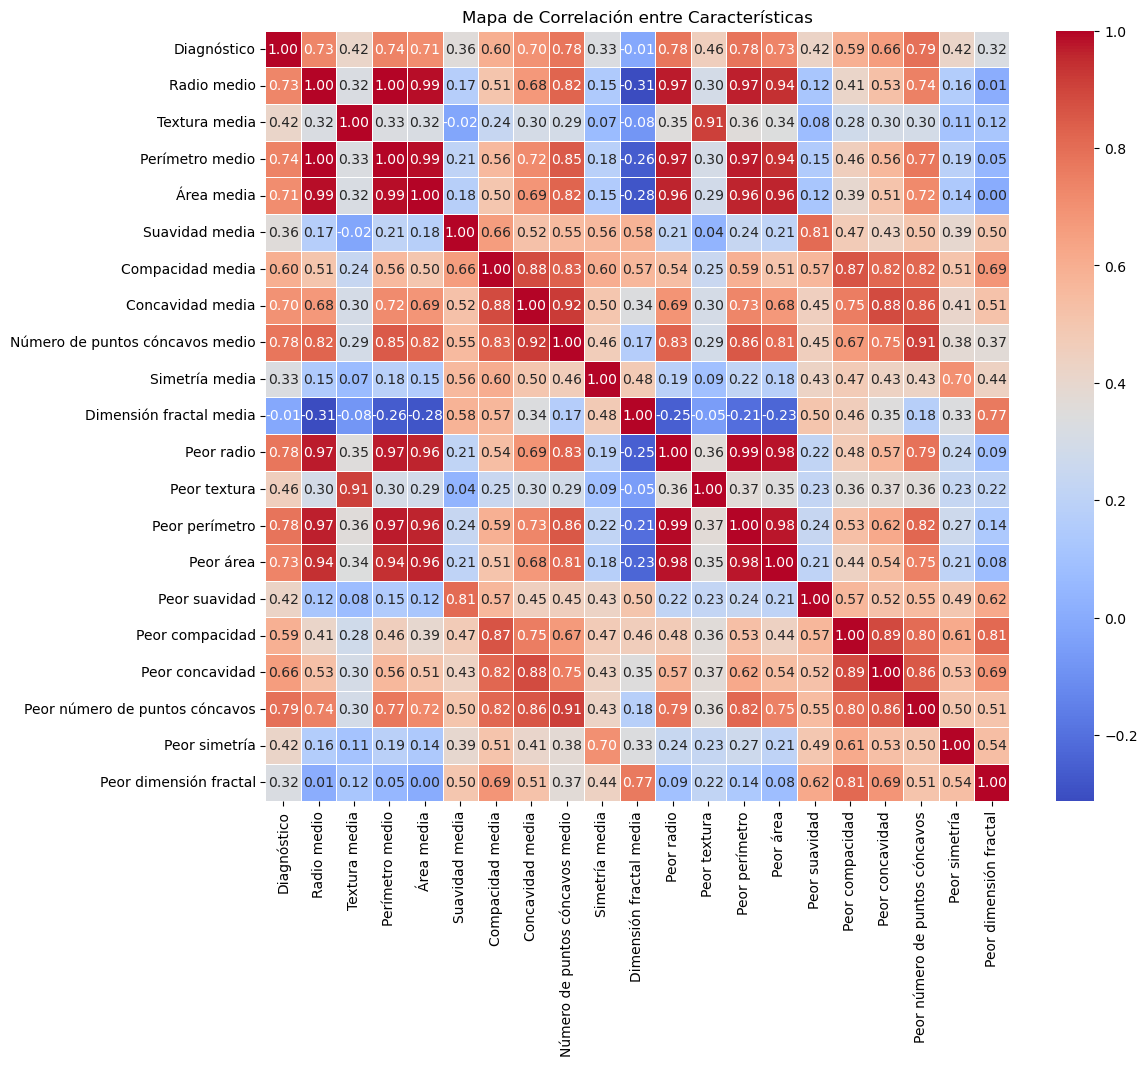

In [5]:
df_corr = df_selected.copy()

# Aplica el mapeo a la columna "Diagnóstico"
df_corr["Diagnóstico"] = df_corr["Diagnóstico"].map({"M": 1, "B": 0})

# Calcula la matriz de correlación
correlation_matrix = df_corr.corr()

# Crea un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlación entre Características')
plt.show()

### División de datos en conjuntos de entretamiento y testeo

In [6]:
X = df_selected.drop(['Diagnóstico'], axis=1)
y = df_selected['Diagnóstico']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=95)

## Experimentos

### kNN Euclidiana

#### Cálculo de k más óptimo

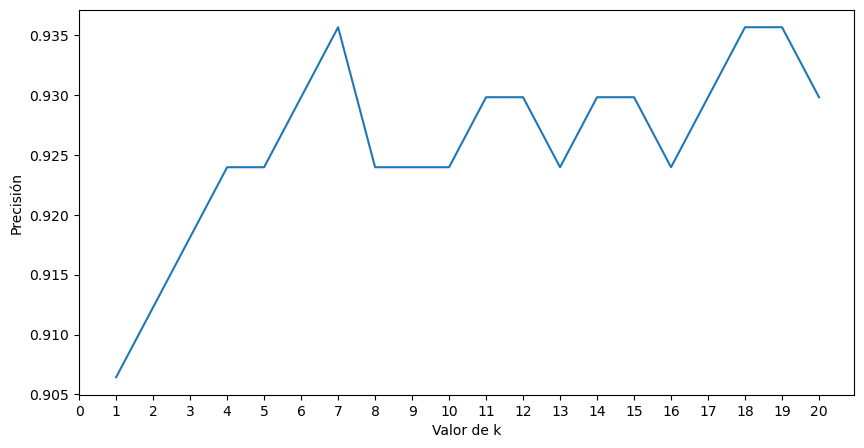

In [7]:
accuracies = []
for k in range(1, 21):
    # Crea y entrena el modelo kNN con k vecinos
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", metric="euclidean")
    knn.fit(X_train, y_train)

    # Evalua el rendimiento del modelo en el conjunto de test
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), accuracies)
plt.xticks(range(0, 21))
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.show()

#### Entrenamiento y métricas

In [8]:
metric = "euclidean"
k = 7
knn = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", metric=metric)
knn.fit(X_train, y_train)

# Predice las etiquetas para los datos de prueba
y_pred = knn.predict(X_test)

# Cálcula las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='B')
recall = recall_score(y_test, y_pred, pos_label='B')
f1 = f1_score(y_test, y_pred, pos_label='B')
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded)
confusion = confusion_matrix(y_test, y_pred)

# Muestra los resultados
print(f"Configuración: k={k}, Métrica={metric}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

Configuración: k=7, Métrica=euclidean
Accuracy: 0.935672514619883
Precision: 0.9401709401709402
Recall: 0.9649122807017544
F1-score: 0.9523809523809523
ROC AUC: 0.9210526315789473


#### Curva ROC

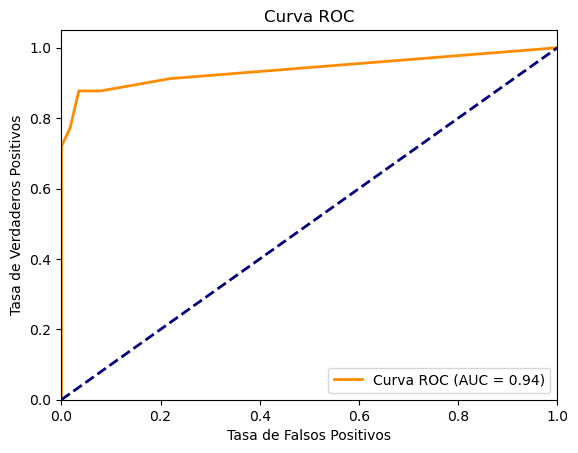

In [9]:
# Calcula la probabilidad de pertenencia a la clase positiva
y_prob = knn.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#### Matriz de confusión

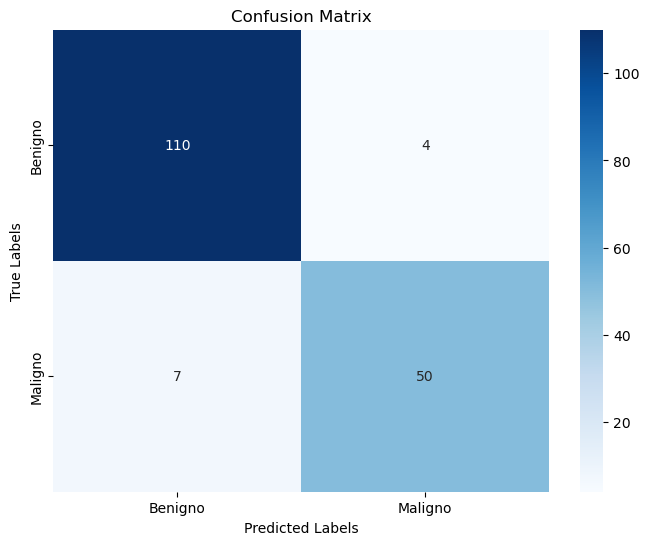

In [10]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Define los nombres de las clases
class_names = ['Benigno', 'Maligno']

# Visualiza la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### kNN Manhattan

#### Cálculo de k más óptimo

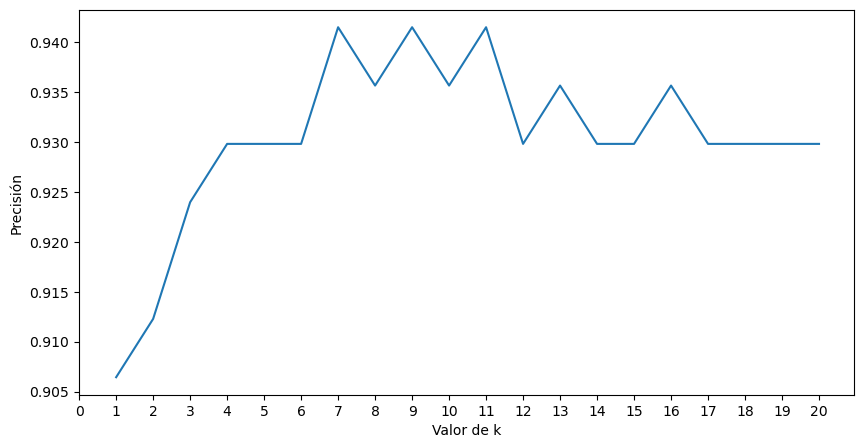

In [11]:
accuracies = []
for k in range(1, 21):
    # Crea y entrena el modelo kNN con k vecinos
    knn_2 = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", metric="manhattan")
    knn_2.fit(X_train, y_train)

    # Evalua el rendimiento del modelo en el conjunto de test
    accuracy = knn_2.score(X_test, y_test)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), accuracies)
plt.xticks(range(0, 21))
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.show()

#### Entrenamiento y métricas

In [12]:
metric = "manhattan"
k = 7
knn_2 = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", metric=metric)
knn_2.fit(X_train, y_train)

# Predice las etiquetas para los datos de prueba
y_pred = knn_2.predict(X_test)

# Cálcula las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='B')
recall = recall_score(y_test, y_pred, pos_label='B')
f1 = f1_score(y_test, y_pred, pos_label='B')
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded)
confusion = confusion_matrix(y_test, y_pred)

# Muestra los resultados
print(f"Configuración: k={k}, Métrica={metric}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

Configuración: k=7, Métrica=manhattan
Accuracy: 0.9415204678362573
Precision: 0.940677966101695
Recall: 0.9736842105263158
F1-score: 0.956896551724138
ROC AUC: 0.9254385964912282


#### Curva ROC

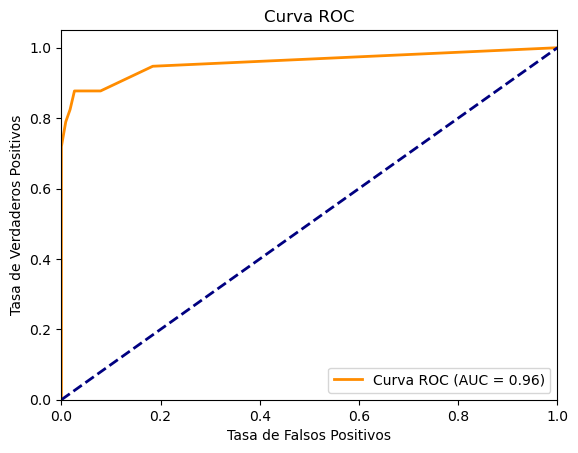

In [13]:
# Calcula la probabilidad de pertenencia a la clase positiva
y_prob = knn_2.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Matriz de confusión

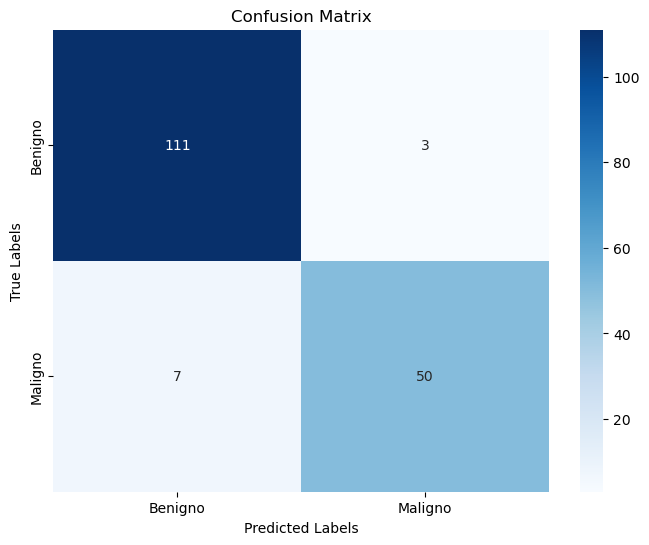

In [14]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Define los nombres de las clases
class_names = ['Benigno', 'Maligno']

# Visualiza la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### kNN Chebyshev

#### Cálculo de k más óptimo

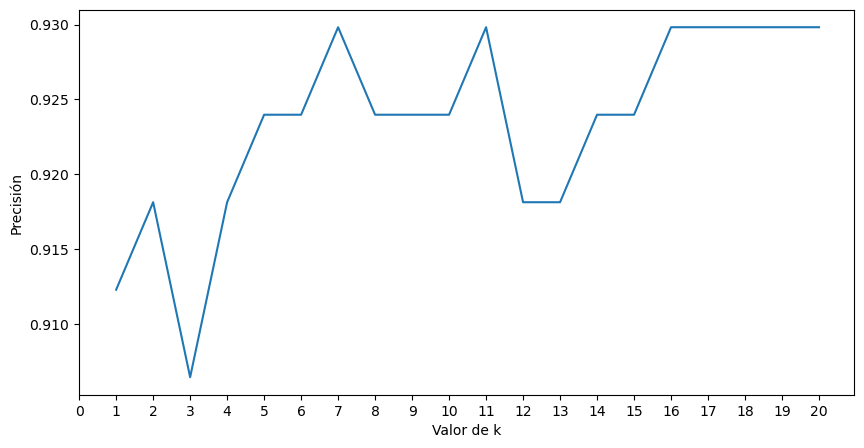

In [15]:
accuracies = []
for k in range(1, 21):
    # Crea y entrena el modelo kNN con k vecinos
    knn_3 = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", metric="chebyshev")
    knn_3.fit(X_train, y_train)

    # Evalua el rendimiento del modelo en el conjunto de test
    accuracy = knn_3.score(X_test, y_test)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), accuracies)
plt.xticks(range(0, 21))
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.show()

#### Entrenamiento y métricas

In [16]:
metric = "chebyshev"
k = 7
knn_3 = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", metric=metric)
knn_3.fit(X_train, y_train)

# Predice las etiquetas para los datos de prueba
y_pred = knn_3.predict(X_test)

# Cálcula las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='B')
recall = recall_score(y_test, y_pred, pos_label='B')
f1 = f1_score(y_test, y_pred, pos_label='B')
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded)
confusion = confusion_matrix(y_test, y_pred)

# Muestra los resultados
print(f"Configuración: k={k}, Métrica={metric}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

Configuración: k=7, Métrica=chebyshev
Accuracy: 0.9298245614035088
Precision: 0.9322033898305084
Recall: 0.9649122807017544
F1-score: 0.9482758620689654
ROC AUC: 0.9122807017543859


#### Curva ROC

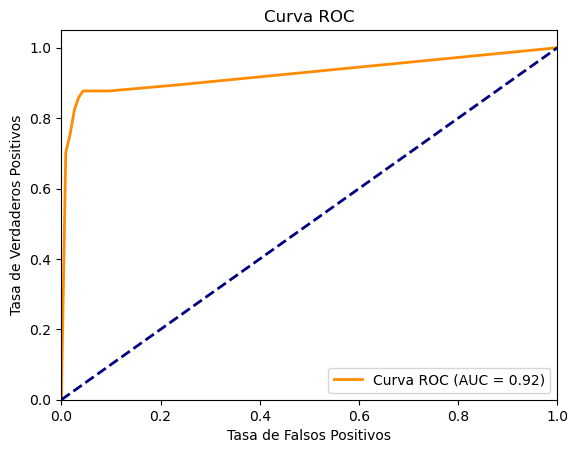

In [17]:
# Calcula la probabilidad de pertenencia a la clase positiva
y_prob = knn_3.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#### Matriz de confusión

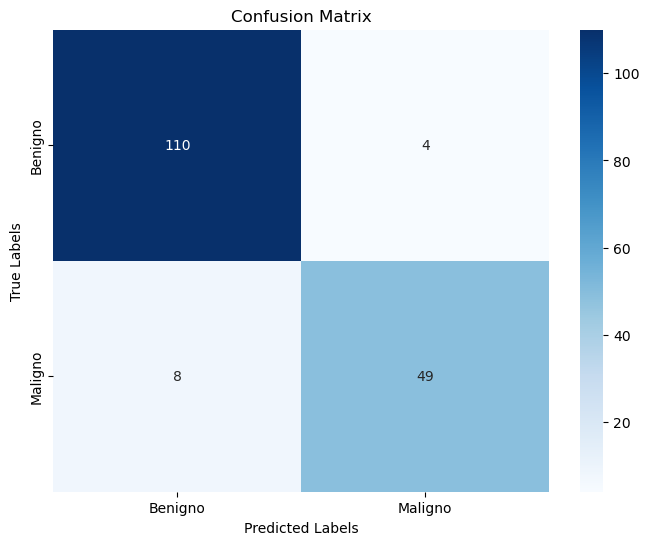

In [18]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Define los nombres de las clases
class_names = ['Benigno', 'Maligno']

# Visualiza la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Comparativa de métricas kNN

In [19]:
# Define métricas de distancia
metrics = ['euclidean', 'manhattan', 'chebyshev']

# Lista para almacenar los resultados
results = []

# Ciclo para calcular métricas para cada métrica de distancia
for metric in metrics:
    # Crea y entrena el clasificador k-NN
    knn = KNeighborsClassifier(n_neighbors=3, algorithm="kd_tree", metric=metric)
    knn.fit(X_train, y_train)
    
    # Realiza las predicciones
    y_pred = knn.predict(X_test)
    
    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='B')
    recall = recall_score(y_test, y_pred, pos_label='B')
    f1 = f1_score(y_test, y_pred, pos_label='B')
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_pred_encoded = label_encoder.transform(y_pred)
    roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded)
    
    # Agrega los resultados a la lista
    results.append([metric, accuracy, precision, recall, f1, roc_auc])

# Muestra los resultados en forma de tabla
headers = ["Metrica", "Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))

╒═══════════╤════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Metrica   │   Accuracy │   Precision │   Recall │   F1-score │   ROC AUC │
╞═══════════╪════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ euclidean │   0.918129 │    0.938596 │ 0.938596 │   0.938596 │  0.907895 │
├───────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ manhattan │   0.923977 │    0.93913  │ 0.947368 │   0.943231 │  0.912281 │
├───────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ chebyshev │   0.906433 │    0.929825 │ 0.929825 │   0.929825 │  0.894737 │
╘═══════════╧════════════╧═════════════╧══════════╧════════════╧═══════════╛


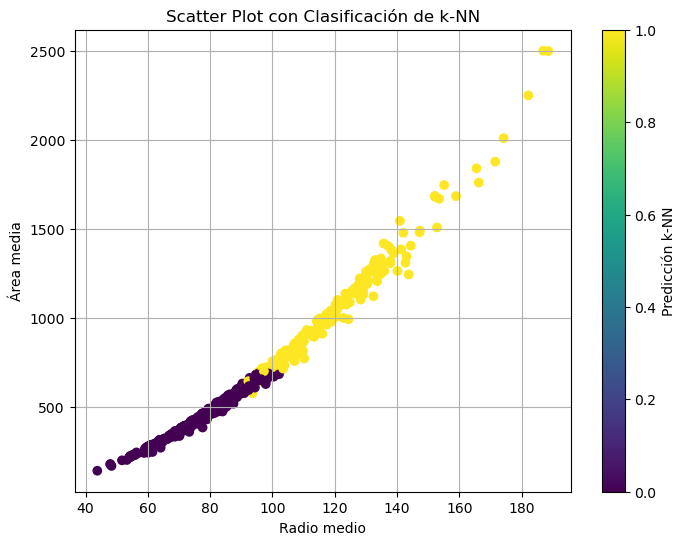

In [20]:
# Selección de características
X = df_selected[["Perímetro medio", "Área media"]].values
y = df_selected["Diagnóstico"].map({"M": 1, "B": 0}).values

# Creación y entrenamiento del clasificador k-NN
knn = KNeighborsClassifier(n_neighbors=7, algorithm="kd_tree", metric=metric)
knn.fit(X, y)

# Predicción de las etiquetas para los puntos
y_pred = knn.predict(X)

# Gráfico de dispersión de las características con las etiquetas predichas por k-NN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o')
plt.xlabel('Radio medio')
plt.ylabel('Área media')
plt.title('Scatter Plot con Clasificación de k-NN')
plt.colorbar(label='Predicción k-NN')
plt.grid(True)
plt.show()

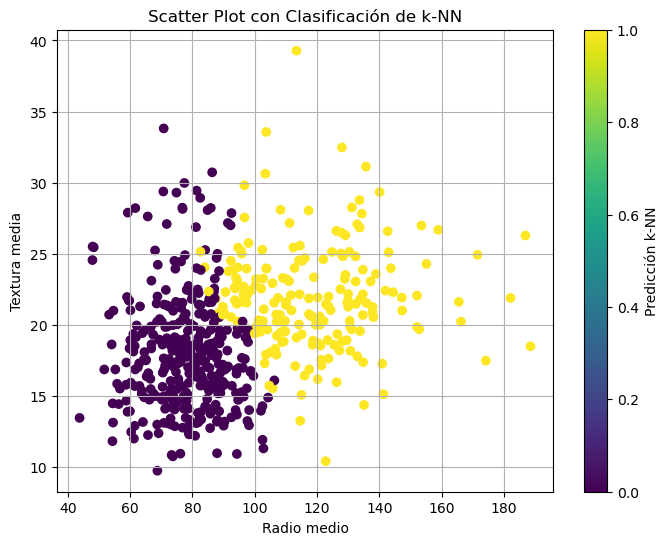

In [21]:
# Selección de características
X = df_selected[["Perímetro medio", "Textura media"]].values
y = df_selected["Diagnóstico"].map({"M": 1, "B": 0}).values

# Creación y entrenamiento del clasificador k-NN
knn = KNeighborsClassifier(n_neighbors=7, algorithm="kd_tree", metric=metric)
knn.fit(X, y)

# Predicción de las etiquetas para los puntos
y_pred = knn.predict(X)

# Gráfico de dispersión de las características con las etiquetas predichas por k-NN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o')
plt.xlabel('Radio medio')
plt.ylabel('Textura media')
plt.title('Scatter Plot con Clasificación de k-NN')
plt.colorbar(label='Predicción k-NN')
plt.grid(True)
plt.show()

## Aleatorización de un dataset para testeo de predicción

In [22]:
labels = ["Radio medio", "Textura media", "Perímetro medio", "Área media", "Suavidad media", "Compacidad media", "Concavidad media",
          "Número de puntos cóncavos medio", "Simetría media", "Dimensión fractal media", "Peor radio", "Peor textura", "Peor perímetro", "Peor área",
          "Peor suavidad", "Peor compacidad", "Peor concavidad", "Peor número de puntos cóncavos", "Peor simetría", "Peor dimensión fractal"]

# Define los mínimos y máximos proporcionados para cada característica
minimos = [6.981, 9.71, 43.79, 143.5, 0.05263, 0.01938, 0.0, 0.0, 0.106, 0.04996, 7.93, 12.02, 50.41, 185.2, 0.07117, 0.02729, 0.0, 0.0, 0.1565, 0.05504]
maximos = [28.11, 39.28, 188.5, 2501.0, 0.1634, 0.3454, 0.4268, 0.2012, 0.304, 0.09744, 36.04, 49.54, 251.2, 4254.0, 0.2226, 1.058, 1.252, 0.291, 0.6638, 0.2075]

# Genera datos aleatorios dentro de los rangos especificados
datos_generados = {}
for i, (caracteristica, minimo, maximo) in enumerate(zip(labels, minimos, maximos)):
    datos_generados[caracteristica] = np.random.uniform(low=minimo, high=maximo, size=100)

# Convierte a DataFrame de pandas
df_generated = pd.DataFrame(datos_generados)
df_generated

,Radio medio,Textura media,Perímetro medio,Área media,Suavidad media,Compacidad media,Concavidad media,Número de puntos cóncavos medio,Simetría media,Dimensión fractal media,Peor radio,Peor textura,Peor perímetro,Peor área,Peor suavidad,Peor compacidad,Peor concavidad,Peor número de puntos cóncavos,Peor simetría,Peor dimensión fractal
0,7.414404,36.617911,81.947469,514.726317,0.084976,0.052685,0.157070,0.048009,0.211296,0.079138,26.778998,34.564982,201.724286,2446.950466,0.128861,0.587462,0.785690,0.201277,0.450225,0.058577
1,27.084275,32.184149,98.803725,618.319493,0.141077,0.306380,0.293549,0.022034,0.242137,0.059808,16.823485,16.487185,61.780482,475.702377,0.193161,0.562796,0.597157,0.023859,0.558409,0.179614
2,18.657247,36.173324,83.146450,1407.504119,0.150397,0.235067,0.411670,0.118824,0.273657,0.071914,34.213848,48.197343,78.097586,1576.545426,0.130880,0.508872,1.087112,0.091025,0.187663,0.095962
3,19.038869,28.092854,120.109905,1595.701283,0.150369,0.172625,0.054701,0.063525,0.276986,0.084717,29.514630,44.675762,79.201548,2601.902704,0.192310,0.311721,0.984046,0.246923,0.294992,0.064621
4,14.788926,14.606069,173.723576,1150.634914,0.061996,0.316403,0.225008,0.113075,0.183463,0.095218,15.688041,20.822341,162.481889,2257.799184,0.134605,0.177319,0.901682,0.122692,0.285235,0.081059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22.339642,15.523488,155.233953,1235.744602,0.112255,0.195567,0.169993,0.084440,0.175698,0.076067,12.005177,31.979162,122.226433,2986.501595,0.201312,0.519506,0.863360,0.239751,0.583990,0.187973
96,19.786599,11.654426,73.863242,1615.007985,0.155273,0.322667,0.208474,0.057694,0.123211,0.078959,21.937927,35.404642,102.146537,1399.551524,0.132367,0.829250,0.539567,0.246035,0.397280,0.110266
97,24.965691,34.406648,46.174944,1765.476250,0.096506,0.238288,0.044783,0.092704,0.116647,0.074299,27.753886,24.373703,230.455505,2823.034222,0.107812,0.117127,0.985427,0.040654,0.631407,0.158397
98,23.146728,36.808680,101.396710,1948.006701,0.112994,0.313528,0.054106,0.067124,0.144697,0.092168,20.472585,40.204288,96.492014,446.782415,0.118562,0.243357,0.353014,0.148792,0.532657,0.073527


### Predición del Cancer de mama con valores aleatorios simulando paciente

In [29]:
# Realiza la predicción utilizando el modelo knn
random_observation = df_generated.sample(n=1)
pred = knn_2.predict(random_observation)
pred_text = "Maligno" if pred[0] == "M" else "Benigno"

# Muestra la observación seleccionada y la predicción por consola
print("Observación seleccionada:")
print(random_observation)
print("\nPredicción:")
print(f"El diagnóstico predicho es: {pred_text}")

Observación seleccionada:
    Radio medio  Textura media  Perímetro medio  Área media  Suavidad media  \
80    13.036583      32.730006        76.281032    208.5493        0.104085   

    Compacidad media  Concavidad media  Número de puntos cóncavos medio  \
80          0.343152          0.025686                         0.127765   

    Simetría media  Dimensión fractal media  Peor radio  Peor textura  \
80        0.294804                 0.066212    9.317289     28.462133   

    Peor perímetro    Peor área  Peor suavidad  Peor compacidad  \
80      145.683455  3214.241934       0.143186         0.706098   

    Peor concavidad  Peor número de puntos cóncavos  Peor simetría  \
80         1.216391                        0.105415       0.191044   

    Peor dimensión fractal  
80                0.062126  

Predicción:
El diagnóstico predicho es: Maligno


### Formulario para médico

In [31]:
if True:
    def predecir_diagnostico():
        valores = [float(entry.get()) for entry in entries]
        prediccion = knn_2.predict([valores])
        if prediccion[0] == 'B':
            resultado_label.config(text="El diagnóstico es: Benigno")
        elif prediccion[0] == 'M':
            resultado_label.config(text="El diagnóstico es: Maligno")
    
    root = tk.Tk()
    root.title("Formulario de diagnóstico de cáncer de mama")
    
    # Crea etiquetas y campos de entrada para cada característica
    entries = []
    for i, label_text in enumerate(labels):
        label = ttk.Label(root, text=label_text)
        label.grid(row=i, column=0, padx=10, pady=5, sticky="w")
        entry = ttk.Entry(root)
        entry.grid(row=i, column=1, padx=10, pady=5)
        entries.append(entry)
    
    # Botón para predecir el diagnóstico
    predict_button = ttk.Button(root, text="Predecir", command=predecir_diagnostico)
    predict_button.grid(row=len(labels)+1, column=0, columnspan=2, pady=10)
    
    # Etiqueta para mostrar el resultado de la predicción
    resultado_label = ttk.Label(root, text="")
    resultado_label.grid(row=len(labels)+2, column=0, columnspan=2)
    
    root.mainloop()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
